In [1]:
pip install -U albumentations

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.7/41.7 kB 1.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.0/66.0 kB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290.6/290.6 kB 10.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 632.7/632.7 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20
Note: yo

In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2
import torch
import random
import time  # ÿ¨ÿØŸäÿØ ŸÑÿ•ÿ∂ÿßŸÅÿ© ÿ≠ÿ≥ÿßÿ® ÿ≤ŸÖŸÜ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
import numpy as np
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau  # ÿ¨ÿØŸäÿØ ŸÑŸÖÿπÿØŸÑ ÿßŸÑÿ™ÿπŸÑŸÖ
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  # ÿ¨ÿØŸäÿØ ŸÑŸÑÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸÅÿµŸÑ
from collections import Counter  # ÿ¨ÿØŸäÿØ ŸÑÿ™ÿ≠ŸÑŸäŸÑ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑŸÅÿ¶ÿßÿ™
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ======================================
# 1Ô∏è‚É£ ÿ™ŸáŸäÿ¶ÿ© ÿßŸÑÿ®Ÿäÿ¶ÿ© Ÿàÿ•ÿπÿØÿßÿØÿßÿ™ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±Ÿäÿ©
# ======================================
def set_seed(seed=42):
    """ÿ∂ÿ®ÿ∑ ŸÉŸÑ ÿßŸÑÿ®ÿ∞Ÿàÿ± ÿßŸÑÿπÿ¥Ÿàÿßÿ¶Ÿäÿ© ŸÑÿ∂ŸÖÿßŸÜ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸÇÿßÿ®ŸÑÿ© ŸÑŸÑÿ™ŸÉÿ±ÿßÿ±"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed()  # ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑÿ•ÿπÿØÿßÿØÿßÿ™

In [4]:
# ======================================
# 2Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ŸÖÿ≥ÿßÿ±ÿßÿ™ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Ÿàÿ™ÿ≠ŸÑŸäŸÑŸáÿß
# ======================================
def analyze_dataset(image_paths, labels):
    """ÿ™ÿ≠ŸÑŸäŸÑ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸàÿßŸÑÿ•ÿ≠ÿµÿßÿ¶Ÿäÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©"""
    print("\nüìä Dataset Analysis:")
    print(f"Total samples: {len(image_paths)}")
    print(f"Class distribution: {Counter(labels)}")
    
    # ÿ™ÿ≠ŸÑŸäŸÑ ÿ£ÿ≠ÿ¨ÿßŸÖ ÿßŸÑÿµŸàÿ±
    sizes = []
    for img_path in image_paths[:100]:  # ÿπŸäŸÜÿ© ÿπÿ¥Ÿàÿßÿ¶Ÿäÿ© ŸÑÿπÿØŸÖ ÿ™ÿ≠ŸÖŸäŸÑ ŸÉŸÑ ÿßŸÑÿµŸàÿ±
        img = cv2.imread(img_path)
        if img is not None:
            sizes.append(img.shape)
    
    print("\nüìê Image sizes analysis (sample):")
    print(f"Min size: {min(sizes, key=lambda x: x[0])[0]}x{min(sizes, key=lambda x: x[1])[1]}")
    print(f"Max size: {max(sizes, key=lambda x: x[0])[0]}x{max(sizes, key=lambda x: x[1])[1]}")
    print(f"Average size: {sum(s[0] for s in sizes)//len(sizes)}x{sum(s[1] for s in sizes)//len(sizes)}")

In [5]:
# ======================================
# 3Ô∏è‚É£ ŸÅÿ¶ÿ© Dataset ÿßŸÑŸÖÿ≠ÿ≥ŸÜÿ©
# ======================================
class FootballTacklesDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        
        # ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ŸÉŸÑ ÿßŸÑÿµŸàÿ±
        self.valid_indices = []
        for idx, img_path in enumerate(self.image_paths):
            if os.path.exists(img_path):
                self.valid_indices.append(idx)
            else:
                print(f"‚ö†Ô∏è Warning: Missing image {img_path}")

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        actual_idx = self.valid_indices[idx]
        img_path = self.image_paths[actual_idx]
        label = self.labels[actual_idx]

        try:
            image = cv2.imread(img_path)
            if image is None:
                raise FileNotFoundError(f"Failed to read image at {img_path}")
                
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            if self.transform:
                augmented = self.transform(image=image)
                image = augmented["image"]
                
            return image, torch.tensor(label, dtype=torch.long)
            
        except Exception as e:
            print(f"Error processing image {img_path}: {str(e)}")
            # ÿ•ÿ±ÿ¨ÿßÿπ ÿµŸàÿ±ÿ© ŸÅÿßÿ±ÿ∫ÿ© Ÿàÿ™ÿÆÿ∑ŸäŸáÿß ŸÑÿßÿ≠ŸÇÿßŸã ŸÅŸä DataLoader
            dummy_image = torch.zeros(3, 224, 224)
            return dummy_image, torch.tensor(-1, dtype=torch.long)  # ÿπŸÑÿßŸÖÿ© -1 ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÅÿßÿ≥ÿØÿ©

In [6]:
# ======================================
# 4Ô∏è‚É£ ÿ™ÿ≠ÿ≥ŸäŸÜÿßÿ™ ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# ======================================
def get_transforms():
    train_transform = A.Compose([
        A.Resize(224, 224),
        A.HorizontalFlip(p=0.5),  # ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ÿ®ÿßŸÑŸÇŸÑÿ® ÿßŸÑÿ£ŸÅŸÇŸä ŸÅŸÇÿ∑
        A.RandomBrightnessContrast(p=0.2),  # ÿ™ÿπÿØŸäŸÑ ÿßŸÑÿ≥ÿ∑Ÿàÿπ ŸàÿßŸÑÿ™ÿ®ÿßŸäŸÜ
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.5),  # ÿßŸÑÿßÿ≠ÿ™ŸÅÿßÿ∏ ÿ®ÿßŸÑÿ™ŸÜÿßŸàÿ®/ÿßŸÑÿ™ÿ≠ÿ¨ŸäŸÖ
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])

    test_transform = A.Compose([  # ŸÑŸÖ Ÿäÿ™ÿ∫Ÿäÿ±
        A.Resize(224, 224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])
    
    return train_transform, test_transform

In [7]:
# ======================================
# 5Ô∏è‚É£ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Ÿàÿ™ŸÇÿ≥ŸäŸÖŸáÿß
# ======================================
def load_and_split_data(dataset_path, test_size=0.15, val_size=0.15):
    """ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ Ÿàÿ™ŸÇÿ≥ŸäŸÖŸáÿß ŸÖÿπ ÿ™ÿ≠ÿ≥ŸäŸÜÿßÿ™"""
    categories = ["Clean_Tackles", "Fouls"]
    image_paths, labels = [], []

    for idx, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f"Category path {category_path} does not exist")
            
        for img_file in os.listdir(category_path):
            full_path = os.path.join(category_path, img_file)
            image_paths.append(full_path)
            labels.append(idx)

    # ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÇÿ®ŸÑ ÿßŸÑÿ™ŸÇÿ≥ŸäŸÖ
    analyze_dataset(image_paths, labels)
    
    # ÿßŸÑÿ™ŸÇÿ≥ŸäŸÖ: 70% ÿ™ÿØÿ±Ÿäÿ®ÿå 15% ÿ™ÿ≠ŸÇŸÇÿå 15% ÿßÿÆÿ™ÿ®ÿßÿ±
    train_images, test_images, train_labels, test_labels = train_test_split(
        image_paths, labels, test_size=test_size+val_size, random_state=42, stratify=labels
    )
    
    val_images, test_images, val_labels, test_labels = train_test_split(
        test_images, test_labels, test_size=test_size/(test_size+val_size), random_state=42, stratify=test_labels
    )
    
    return train_images, val_images, test_images, train_labels, val_labels, test_labels


In [8]:
# ======================================
# 6Ô∏è‚É£ ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿπ ÿ™ÿ≠ÿ≥ŸäŸÜÿßÿ™
# ======================================
def setup_model(num_classes, device, model_name='resnet50'):
    """ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿπ ÿÆŸäÿßÿ±ÿßÿ™ ŸÖÿ™ÿπÿØÿØÿ©"""
    if model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1) 
    elif model_name == 'efficientnet':
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1) 
    else:
        raise ValueError(f"Unknown model {model_name}")
    
    # ÿ™ÿ¨ŸÖŸäÿØ ÿßŸÑÿ∑ÿ®ŸÇÿßÿ™ ÿßŸÑÿ£ŸàŸÑŸâ
    for param in model.parameters():
        param.requires_grad = False
        
    # ÿ™ÿπÿØŸäŸÑ ÿßŸÑÿ∑ÿ®ŸÇÿ© ÿßŸÑÿ£ÿÆŸäÿ±ÿ©
    if model_name == 'resnet50':
        num_ftrs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
    else:  # efficientnet
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    
    model = model.to(device)
    
    # ÿ∑ÿ®ÿßÿπÿ© ŸÖŸÑÿÆÿµ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
    print(f"\nüîÑ Using {model_name} with {sum(p.numel() for p in model.parameters() if p.requires_grad):,} trainable parameters")
    
    return model

In [9]:
# ======================================
# 7Ô∏è‚É£ ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ŸÖÿπ Early Stopping ŸàÿßŸÑÿ™ÿ™ÿ®ÿπ
# ======================================
def train_model(model, loaders, criterion, optimizer, scheduler, num_epochs, device):
    """ÿØÿßŸÑÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÖÿ≠ÿ≥ŸÜÿ© ŸÖÿπ Early Stopping Ÿàÿ™ÿ™ÿ®ÿπ ÿßŸÑÿ£ÿØÿßÿ°"""
    history = {
        'train_loss': [], 'val_loss': [],
        'train_acc': [], 'val_acc': [],
        'lr': []  # ÿ¨ÿØŸäÿØ ŸÑÿ™ÿ™ÿ®ÿπ ŸÖÿπÿØŸÑ ÿßŸÑÿ™ÿπŸÑŸÖ
    }
    
    best_val_loss = float('inf')
    best_model_weights = None
    patience = 3
    no_improve = 0
    
    start_time = time.time()
    
    for epoch in range(num_epochs):
        epoch_start = time.time()
        
        # ŸÖÿ±ÿ≠ŸÑÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(loaders['train'], desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            images, labels = images.to(device), labels.to(device)
            
            # ÿ™ÿÆÿ∑Ÿä ÿßŸÑÿπŸäŸÜÿßÿ™ ÿßŸÑŸÅÿßÿ≥ÿØÿ© (ÿßŸÑÿ™Ÿä ÿ™ÿ≠ŸÖŸÑ ÿπŸÑÿßŸÖÿ© -1)
            if (labels == -1).any():
                continue
                
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        
        train_loss = running_loss / total
        train_acc = 100 * correct / total
        
        # ŸÖÿ±ÿ≠ŸÑÿ© ÿßŸÑÿ™ÿ≠ŸÇŸÇ
        val_loss, val_acc = evaluate_model(model, loaders['val'], criterion, device)
        
        # ÿ™ÿ≠ÿØŸäÿ´ ŸÖÿπÿØŸÑ ÿßŸÑÿ™ÿπŸÑŸÖ
        if scheduler:
            scheduler.step(val_loss)
            current_lr = optimizer.param_groups[0]['lr']
            history['lr'].append(current_lr)
            print(f"Current Learning Rate: {current_lr:.2e}")

        # ÿ≠ŸÅÿ∏ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_weights = model.state_dict()
            torch.save(best_model_weights, 'best_model.pth')
            no_improve = 0
            print("üî• Model improved and saved!")
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"üõë Early stopping at epoch {epoch+1}")
                break
        
        epoch_time = time.time() - epoch_start
        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.2f}% | "
              f"LR: {current_lr:.2e} | Time: {epoch_time:.1f}s")
    
    total_time = time.time() - start_time
    print(f"\n‚úÖ Training completed in {total_time//60:.0f}m {total_time%60:.0f}s")
    
    # ÿ™ÿ≠ŸÖŸäŸÑ ÿ£ŸÅÿ∂ŸÑ ÿ£Ÿàÿ≤ÿßŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
    model.load_state_dict(best_model_weights)
    
    return model, history

In [10]:
# ======================================
# 8Ô∏è‚É£ ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸÅÿµŸÑ ŸÑŸÑŸÜŸÖŸàÿ∞ÿ¨
# ======================================
def evaluate_model(model, loader, criterion, device):
    """ÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ŸÖÿπ ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿÆÿ≥ÿßÿ±ÿ© ŸàÿßŸÑÿØŸÇÿ©"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            
            # ÿ™ÿÆÿ∑Ÿä ÿßŸÑÿπŸäŸÜÿßÿ™ ÿßŸÑŸÅÿßÿ≥ÿØÿ©
            if (labels == -1).any():
                continue
                
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    loss = running_loss / total if total > 0 else 0
    accuracy = 100 * correct / total if total > 0 else 0
    
    return loss, accuracy

def detailed_evaluation(model, loader, device, class_names):
    """ÿ™ŸÇŸäŸäŸÖ ŸÖŸÅÿµŸÑ ŸÖÿπ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßÿ±ÿ™ÿ®ÿßŸÉ ŸàÿßŸÑÿ™ŸÇÿ±Ÿäÿ±"""
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            
            if (labels == -1).any():
                continue
                
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    print("\nüìä Detailed Evaluation:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    # ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿßÿ±ÿ™ÿ®ÿßŸÉ
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return all_preds, all_labels

In [11]:
# ======================================
# 9Ô∏è‚É£ ÿ™ÿµŸàÿ± ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
# ======================================
def plot_training_history(history):
    """ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÑÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®"""
    plt.figure(figsize=(12, 5))
    
    # ÿ±ÿ≥ŸÖ ÿßŸÑÿÆÿ≥ÿßÿ±ÿ©
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # ÿ±ÿ≥ŸÖ ÿßŸÑÿØŸÇÿ©
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # ÿ±ÿ≥ŸÖ ŸÖÿπÿØŸÑ ÿßŸÑÿ™ÿπŸÑŸÖ ÿ•ÿ∞ÿß ŸÉÿßŸÜ ŸÖŸàÿ¨ŸàÿØÿßŸã
    if 'lr' in history:
        plt.figure(figsize=(6, 4))
        plt.plot(history['lr'], label='Learning Rate')
        plt.title('Learning Rate Schedule')
        plt.xlabel('Epoch')
        plt.ylabel('LR')
        plt.legend()
        plt.show()

In [12]:
# ======================================
# üîü ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ÿµŸàÿ±ÿ© Ÿàÿßÿ≠ÿØÿ©
# ======================================
def predict_single_image(model, image_path, transform, device, class_names):
    """ÿ™ŸÜÿ®ÿ§ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿπŸÑŸâ ÿµŸàÿ±ÿ© Ÿàÿßÿ≠ÿØÿ©"""
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image {image_path} not found")
    
    model.eval()
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to read image {image_path}")
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑÿ™ÿ≠ŸàŸäŸÑÿßÿ™
    augmented = transform(image=image)
    img_tensor = augmented["image"].unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)
        prob = torch.nn.functional.softmax(output, dim=1)
    
    pred_class = class_names[predicted.item()]
    confidence = prob[0][predicted.item()].item()
    
    # ÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÜÿ™Ÿäÿ¨ÿ©
    plt.imshow(image)
    plt.title(f"Predicted: {pred_class}\nConfidence: {confidence:.2%}")
    plt.axis('off')
    plt.show()
    
    return pred_class, confidence

Using device: cuda

üìä Dataset Analysis:
Total samples: 925
Class distribution: Counter({0: 496, 1: 429})

üìê Image sizes analysis (sample):
Min size: 162x202
Max size: 905x1496
Average size: 668x879


/usr/local/lib/python3.10/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.5M/20.5M [00:00<00:00, 135MB/s] 



üîÑ Using efficientnet with 2,562 trainable parameters
Current LR: 0.001


Epoch 1/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.38it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 1/10 | Train Loss: 0.6833, Acc: 56.11% | Val Loss: 0.6237, Acc: 69.78% | LR: 1.00e-03 | Time: 5.7s


Epoch 2/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:02<00:00,  7.25it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 2/10 | Train Loss: 0.6005, Acc: 69.86% | Val Loss: 0.5769, Acc: 74.10% | LR: 1.00e-03 | Time: 3.7s


Epoch 3/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:03<00:00,  6.84it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 3/10 | Train Loss: 0.5636, Acc: 72.95% | Val Loss: 0.5386, Acc: 78.42% | LR: 1.00e-03 | Time: 4.0s


Epoch 4/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:03<00:00,  6.68it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 4/10 | Train Loss: 0.5185, Acc: 77.28% | Val Loss: 0.5133, Acc: 76.98% | LR: 1.00e-03 | Time: 3.9s


Epoch 5/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:02<00:00,  7.10it/s]


Current Learning Rate: 1.00e-03
Epoch 5/10 | Train Loss: 0.5215, Acc: 77.13% | Val Loss: 0.5148, Acc: 74.82% | LR: 1.00e-03 | Time: 3.7s


Epoch 6/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:03<00:00,  6.82it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 6/10 | Train Loss: 0.5009, Acc: 77.28% | Val Loss: 0.5041, Acc: 75.54% | LR: 1.00e-03 | Time: 3.9s


Epoch 7/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:03<00:00,  6.80it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 7/10 | Train Loss: 0.4840, Acc: 77.59% | Val Loss: 0.4766, Acc: 79.86% | LR: 1.00e-03 | Time: 3.9s


Epoch 8/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:03<00:00,  5.59it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 8/10 | Train Loss: 0.4792, Acc: 79.91% | Val Loss: 0.4757, Acc: 79.14% | LR: 1.00e-03 | Time: 4.5s


Epoch 9/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:03<00:00,  6.94it/s]


Current Learning Rate: 1.00e-03
Epoch 9/10 | Train Loss: 0.4471, Acc: 82.53% | Val Loss: 0.4865, Acc: 74.82% | LR: 1.00e-03 | Time: 3.7s


Epoch 10/10 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:03<00:00,  6.97it/s]


Current Learning Rate: 1.00e-03
üî• Model improved and saved!
Epoch 10/10 | Train Loss: 0.4491, Acc: 79.60% | Val Loss: 0.4569, Acc: 79.14% | LR: 1.00e-03 | Time: 3.8s

‚úÖ Training completed in 0m 41s


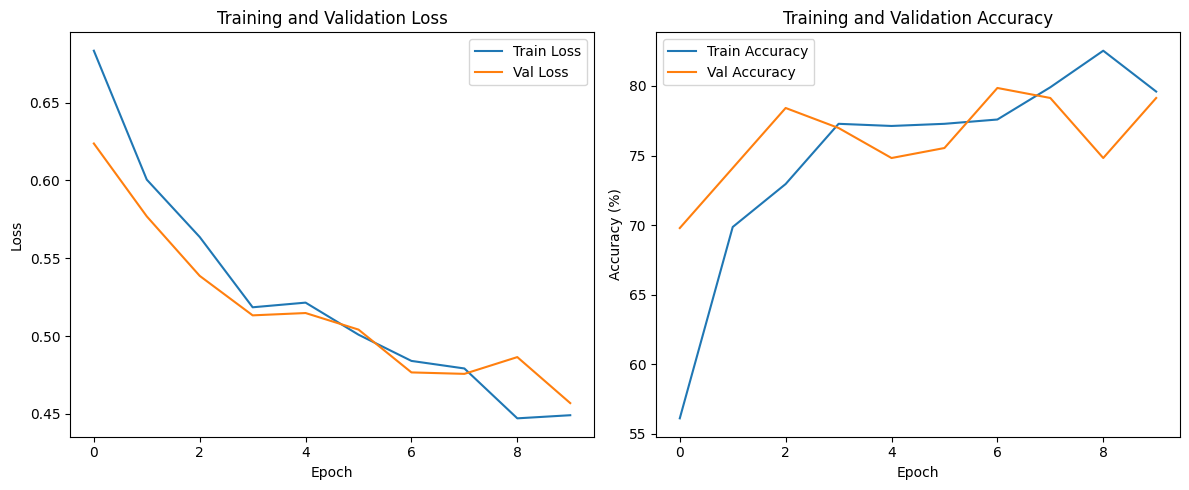

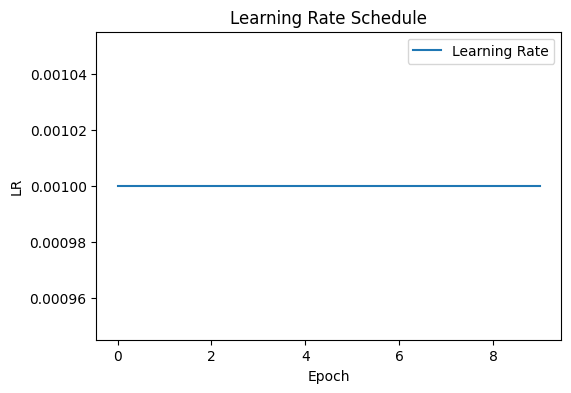


üß™ Test Results - Loss: 0.4902, Accuracy: 76.98%

üìä Detailed Evaluation:
               precision    recall  f1-score   support

Clean_Tackles       0.81      0.75      0.78        75
        Fouls       0.73      0.80      0.76        64

     accuracy                           0.77       139
    macro avg       0.77      0.77      0.77       139
 weighted avg       0.77      0.77      0.77       139



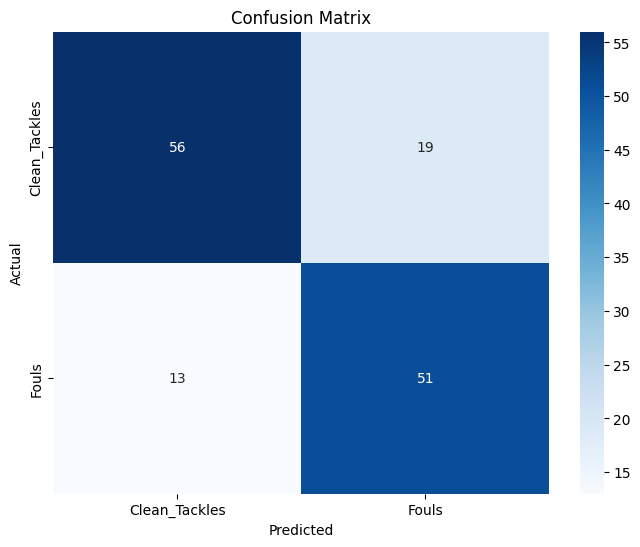

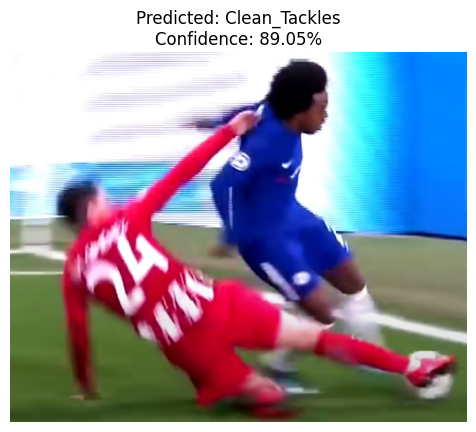


üîç Sample Prediction: Clean_Tackles with 89.05% confidence


In [13]:
# ======================================
# üèÅ ÿßŸÑÿ™ŸÜŸÅŸäÿ∞ ÿßŸÑÿ±ÿ¶Ÿäÿ≥Ÿä
# ======================================
if __name__ == "__main__":
    # 1. ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ¨Ÿáÿßÿ≤
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # 2. ÿ™ÿ≠ŸÖŸäŸÑ Ÿàÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
    dataset_path = "/kaggle/input/football-tackles/var500/VAR"  # ÿ™ÿ∫ŸäŸäÿ± ÿ≠ÿ≥ÿ® ÿßŸÑÿ≠ÿßÿ¨ÿ©
    train_images, val_images, test_images, train_labels, val_labels, test_labels = load_and_split_data(dataset_path)
    
    # 3. ÿ•ÿπÿØÿßÿØ ÿßŸÑÿ™ÿ≠ŸàŸäŸÑÿßÿ™ ŸàŸÖÿ≠ŸÖŸÑÿßÿ™ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
    train_transform, test_transform = get_transforms()
    
    train_dataset = FootballTacklesDataset(train_images, train_labels, train_transform)
    val_dataset = FootballTacklesDataset(val_images, val_labels, test_transform)
    test_dataset = FootballTacklesDataset(test_images, test_labels, test_transform)
    
    loaders = {
        'train': DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2),
        'val': DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2),
        'test': DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)
    }
    
    # 4. ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
    class_names = ["Clean_Tackles", "Fouls"]
    model = setup_model(len(class_names), device, model_name='efficientnet')
    
    # 5. ÿ•ÿπÿØÿßÿØ ÿßŸÑÿÆÿ≥ÿßÿ±ÿ© ŸàÿßŸÑŸÖÿ≠ÿ≥ŸÜ
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Current LR: {optimizer.param_groups[0]['lr']}")
    
    # 6. ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
    model, history = train_model(
        model, loaders, criterion, optimizer, scheduler, 
        num_epochs=10, device=device
    )
    
    # 7. ÿ™ÿµŸàÿ± ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
    plot_training_history(history)
    
    # 8. ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿπŸÑŸâ ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
    test_loss, test_acc = evaluate_model(model, loaders['test'], criterion, device)
    print(f"\nüß™ Test Results - Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%")
    
    # 9. ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿßŸÑŸÖŸÅÿµŸÑ
    detailed_evaluation(model, loaders['test'], device, class_names)
    
    # 10. ÿßÿÆÿ™ÿ®ÿßÿ± ÿπŸÑŸâ ÿµŸàÿ±ÿ© Ÿàÿßÿ≠ÿØÿ© ŸÉŸÖÿ´ÿßŸÑ
    sample_image = test_images[0]  # ÿ£ŸàŸÑ ÿµŸàÿ±ÿ© ŸÅŸä ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
    pred_class, confidence = predict_single_image(
        model, sample_image, test_transform, device, class_names
    )
    print(f"\nüîç Sample Prediction: {pred_class} with {confidence:.2%} confidence")

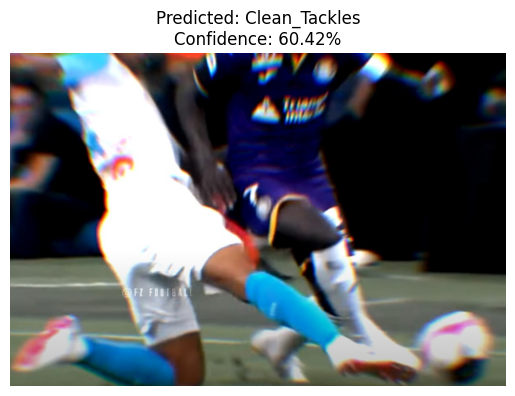


üîç Sample Prediction: Clean_Tackles with 60.42% confidence


In [14]:
# 10. ÿßÿÆÿ™ÿ®ÿßÿ± ÿπŸÑŸâ ÿµŸàÿ±ÿ© Ÿàÿßÿ≠ÿØÿ© ŸÉŸÖÿ´ÿßŸÑ
sample_image = test_images[29]  # ÿ£ŸàŸÑ ÿµŸàÿ±ÿ© ŸÅŸä ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±
pred_class, confidence = predict_single_image(
    model, sample_image, test_transform, device, class_names
)
print(f"\nüîç Sample Prediction: {pred_class} with {confidence:.2%} confidence")